In [1]:
import os
import numpy as np
import pandas as pd
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv(r"C:\Users\User\Downloads\KNN+SVM+NaiveBayes+PCA\KNN + SVM + Naive Bayes + PCA\Wine.csv")
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


# 

# EDA 

In [3]:
df.Customer_Segment.value_counts()


2    71
1    59
3    48
Name: Customer_Segment, dtype: int64

In [4]:
df['Customer_Segment']=df.Customer_Segment.astype(str)
df['Customer_Segment']

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Customer_Segment, Length: 178, dtype: object

In [5]:
s=df[['Customer_Segment']]
s

,Customer_Segment
0,1
1,1
2,1
3,1
4,1
...,...
173,3
174,3
175,3
176,3


In [6]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [7]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    object 
dtypes: float64(11), int64(2), object(1)
memory usage: 19.6+ KB


<AxesSubplot:xlabel='Alcohol', ylabel='Count'>

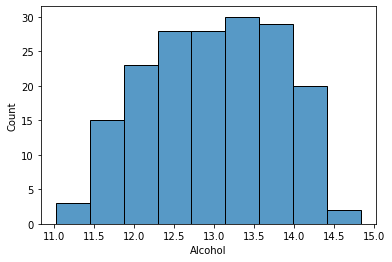

In [9]:
import seaborn as sns 
sns.histplot(x='Alcohol',data=df)

<AxesSubplot:xlabel='Malic_Acid', ylabel='Count'>

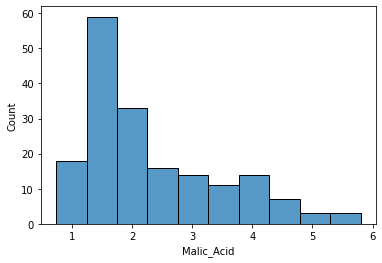

In [10]:
sns.histplot(x='Malic_Acid',data=df)

<AxesSubplot:xlabel='Ash', ylabel='Count'>

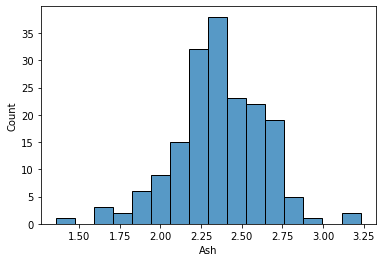

In [11]:
sns.histplot(x='Ash',data=df)

<AxesSubplot:xlabel='Ash_Alcanity', ylabel='Count'>

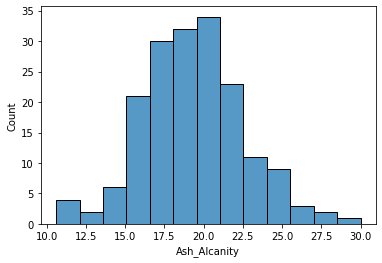

In [12]:
sns.histplot(x='Ash_Alcanity',data=df)

<AxesSubplot:xlabel='Magnesium', ylabel='Count'>

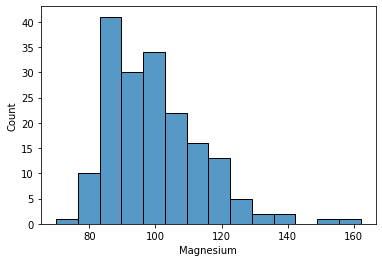

In [13]:
sns.histplot(x='Magnesium',data=df)

In [14]:
ds=df.drop('Customer_Segment',axis=1)
ds

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [15]:
def remove_outlier(df):
    for i in df.columns:
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        iqr = q3-q1 #Interquartile range
        upper_limit = q3+1.5*iqr #acceptable range
        lower_limit = q3-1.5*iqr
        if ((df[i].dtype=='float64')| (df[i].dtype=='int64')):
            df[i][df[i]>=upper_limit]=upper_limit
            df[i][df[i]<=lower_limit]=lower_limit
        else:
            df[i]=df[i]
    return (df)

remove_outlier(ds)

C:\Users\User\AppData\Local\Temp\ipykernel_15184\203280858.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][df[i]>=upper_limit]=upper_limit
C:\Users\User\AppData\Local\Temp\ipykernel_15184\203280858.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][df[i]<=lower_limit]=lower_limit


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.7100,2.43,15.60,127.0,2.80,3.06,0.28,2.29,5.64,1.04000,3.92,1065
1,13.20,1.7800,2.14,15.05,100.0,2.65,2.76,0.26,1.28,4.38,1.05000,3.40,1050
2,13.16,2.3600,2.67,18.60,101.0,2.80,3.24,0.30,2.81,5.68,1.03000,3.17,1185
3,14.37,1.9500,2.50,16.80,113.0,3.85,3.49,0.24,2.18,7.80,0.86000,3.45,1480
4,13.24,2.5900,2.87,21.00,118.0,2.80,2.69,0.39,1.82,4.32,1.04000,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.3025,2.45,20.50,95.0,1.68,0.61,0.52,1.06,7.70,0.64000,1.74,740
174,13.40,3.9100,2.48,23.00,102.0,1.80,0.75,0.43,1.41,7.30,0.70000,1.56,750
175,13.27,4.2800,2.26,20.00,120.0,1.59,0.69,0.43,1.35,10.20,0.61375,1.56,835
176,13.17,2.5900,2.37,20.00,120.0,1.65,0.68,0.53,1.46,9.30,0.61375,1.62,840


In [16]:
ds

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.7100,2.43,15.60,127.0,2.80,3.06,0.28,2.29,5.64,1.04000,3.92,1065
1,13.20,1.7800,2.14,15.05,100.0,2.65,2.76,0.26,1.28,4.38,1.05000,3.40,1050
2,13.16,2.3600,2.67,18.60,101.0,2.80,3.24,0.30,2.81,5.68,1.03000,3.17,1185
3,14.37,1.9500,2.50,16.80,113.0,3.85,3.49,0.24,2.18,7.80,0.86000,3.45,1480
4,13.24,2.5900,2.87,21.00,118.0,2.80,2.69,0.39,1.82,4.32,1.04000,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.3025,2.45,20.50,95.0,1.68,0.61,0.52,1.06,7.70,0.64000,1.74,740
174,13.40,3.9100,2.48,23.00,102.0,1.80,0.75,0.43,1.41,7.30,0.70000,1.56,750
175,13.27,4.2800,2.26,20.00,120.0,1.59,0.69,0.43,1.35,10.20,0.61375,1.56,835
176,13.17,2.5900,2.37,20.00,120.0,1.65,0.68,0.53,1.46,9.30,0.61375,1.62,840


In [17]:
ds.corr()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Alcohol,1.000000,0.090431,0.200039,-0.304407,0.301466,0.307894,0.249630,-0.166647,0.173118,0.549434,-0.052943,0.079981,0.648863
Malic_Acid,0.090431,1.000000,0.137331,0.299169,-0.044212,-0.336992,-0.414950,0.294561,-0.255954,0.266176,-0.569207,-0.372853,-0.191966
Ash,0.200039,0.137331,1.000000,0.427501,0.341714,0.130497,0.098799,0.159618,0.000187,0.235876,-0.039513,-0.002608,0.212528
Ash_Alcanity,-0.304407,0.299169,0.427501,1.000000,-0.104883,-0.328408,-0.362777,0.376745,-0.224907,0.011017,-0.282340,-0.296402,-0.447334
Magnesium,0.301466,-0.044212,0.341714,-0.104883,1.000000,0.227017,0.209439,-0.248119,0.203034,0.236207,0.042740,0.068675,0.412981
Total_Phenols,0.307894,-0.336992,0.130497,-0.328408,0.227017,1.000000,0.865392,-0.457518,0.626350,-0.064057,0.432273,0.698832,0.499428
Flavanoids,0.249630,-0.414950,0.098799,-0.362777,0.209439,0.865392,1.000000,-0.548192,0.659517,-0.170605,0.543259,0.787558,0.494155
Nonflavanoid_Phenols,-0.166647,0.294561,0.159618,0.376745,-0.248119,-0.457518,-0.548192,1.000000,-0.362140,0.127794,-0.265445,-0.509752,-0.315776
Proanthocyanins,0.173118,-0.255954,0.000187,-0.224907,0.203034,0.626350,0.659517,-0.362140,1.000000,-0.044317,0.319863,0.519938,0.342191
Color_Intensity,0.549434,0.266176,0.235876,0.011017,0.236207,-0.064057,-0.170605,0.127794,-0.044317,1.000000,-0.503784,-0.431614,0.327022


#  

# TRANSFORMATION AND PCA

In [18]:
# performing preprocessing part 
from sklearn.preprocessing import StandardScaler 

sc = StandardScaler() # mean 0 & std=1
  
ds1 = sc.fit_transform(ds)
ds1

array([[ 1.54398273, -0.56665732,  0.20053564, ...,  0.3591711 ,
         1.85051835,  1.01300893],
       [ 0.23871324, -0.50279562, -1.04853222, ...,  0.40478338,
         1.11458856,  0.96524152],
       [ 0.18802317,  0.02634424,  1.23424698, ...,  0.31355882,
         0.78908116,  1.39514818],
       ...,
       [ 0.32742088,  1.77797961, -0.53167655, ..., -1.58505244,
        -1.48947069,  0.28057537],
       [ 0.20069569,  0.23617556, -0.05789219, ..., -1.58505244,
        -1.40455571,  0.29649784],
       [ 1.41725754,  1.61376379,  1.53574612, ..., -1.58505244,
        -1.4328607 , -0.59516041]])

In [19]:
from sklearn.decomposition import PCA 
  
pca = PCA(n_components = 3)# we are specifying we want 3 PCA
  
principalComponents= pca.fit(ds1)

In [20]:
principalComponents.explained_variance_   # eigen values 

array([4.78832387, 2.52821028, 1.43283829])

In [21]:
principalComponents.explained_variance_ratio_  

array([0.36626332, 0.19338514, 0.10959913])

In [22]:
principalComponents.mean_

array([-1.11770767e-15, -3.99181312e-17, -6.66133815e-16, -4.39099443e-16,
        1.99590656e-16, -3.59263181e-16,  1.19754394e-16, -1.19754394e-16,
       -9.97953281e-17,  3.99181312e-16, -1.99590656e-16, -3.99181312e-17,
       -1.59672525e-16])

In [23]:
principalComponents.get_covariance()

array([[ 1.05191865,  0.05229501,  0.18034766, -0.29244479,  0.39304689,
         0.29430983,  0.24380717, -0.20729228,  0.21464432,  0.50423722,
        -0.09538001,  0.04836739,  0.57818101],
       [ 0.05229501,  0.80875111,  0.17879406,  0.29185582,  0.01446077,
        -0.38542433, -0.44849726,  0.34066214, -0.32284681,  0.33437354,
        -0.43816408, -0.47272105, -0.14190066],
       [ 0.18034766,  0.17879406,  1.04629848,  0.37775489,  0.31902502,
         0.13476346,  0.08756422,  0.11925665,  0.09217301,  0.23580824,
        -0.09557372, -0.00644861,  0.15659647],
       [-0.29244479,  0.29185582,  0.37775489,  1.05391064, -0.06072152,
        -0.33632159, -0.36692007,  0.41728376, -0.272717  , -0.01567541,
        -0.24078583, -0.30353598, -0.38752757],
       [ 0.39304689,  0.01446077,  0.31902502, -0.06072152,  0.77526708,
         0.30717521,  0.27520913, -0.13993611,  0.23145519,  0.28812977,
         0.01390113,  0.13693889,  0.40779707],
       [ 0.29430983, -0.385424

In [24]:
principalComponents.components_

array([[ 0.15486226, -0.24566899,  0.00420325, -0.2450965 ,  0.14297874,
         0.39317322,  0.42047312, -0.29769032,  0.31761697, -0.08281412,
         0.29345284,  0.37196974,  0.28794863],
       [-0.47768814, -0.229069  , -0.30192195,  0.01205131, -0.32829232,
        -0.05617742,  0.01369068, -0.02552438, -0.02178162, -0.53047581,
         0.27201939,  0.17381104, -0.36081132],
       [-0.19182708,  0.05895983,  0.65006555,  0.59947821,  0.16710199,
         0.1414902 ,  0.13612579,  0.16692051,  0.11159455, -0.15121822,
         0.10944775,  0.14872586, -0.11837668]])

In [25]:
transformed_data=principalComponents.fit_transform(ds1)  ### only give data which is transformed ( principal component)

In [26]:
print("original shape:   ", ds1.shape)
print("transformed shape:", transformed_data.shape)

original shape:    (178, 13)
transformed shape: (178, 3)


In [27]:
principalDf = pd.DataFrame(data = transformed_data
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
principalDf.head()

,principal component 1,principal component 2,principal component 3
0,3.433060,-1.493288,-0.200890
1,1.947777,0.412922,-1.539914
2,2.603904,-1.006124,0.982898
3,3.851438,-2.769399,-0.235707
4,1.031268,-0.967743,2.274801


In [28]:
Correlation=round(principalDf.corr(),3)
Correlation.style.applymap(lambda x: 'background-color : yellow' if x > 0.5 else '')

,principal component 1,principal component 2,principal component 3
principal component 1,1.000000,0.000000,-0.000000
principal component 2,0.000000,1.000000,-0.000000
principal component 3,-0.000000,-0.000000,1.000000


In [29]:
numeric_predictors_1=['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']
scaled_train=pd.DataFrame(ds1,columns=numeric_predictors_1)
scaled_train.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.543983,-0.566657,0.200536,-1.316982,2.068994,0.810941,1.034944,-0.681230,1.306960,0.266301,0.359171,1.850518,1.013009
1,0.238713,-0.502796,-1.048532,-1.497927,0.034709,0.568907,0.733668,-0.845093,-0.628982,-0.293561,0.404783,1.114589,0.965242
2,0.188023,0.026344,1.234247,-0.330008,0.110053,0.810941,1.215710,-0.517366,2.303682,0.284075,0.313559,0.789081,1.395148
3,1.721398,-0.347703,0.502035,-0.922192,1.014180,2.505185,1.466773,-1.008956,1.096114,1.226065,-0.461850,1.185351,2.334574
4,0.289403,0.236176,2.095673,0.459571,1.390899,0.810941,0.663371,0.220019,0.406076,-0.320221,0.359171,0.449421,-0.037874


In [30]:
final_data=pd.concat([scaled_train,principalDf],axis=1)
final_data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,principal component 1,principal component 2,principal component 3
0,1.543983,-0.566657,0.200536,-1.316982,2.068994,0.810941,1.034944,-0.681230,1.306960,0.266301,0.359171,1.850518,1.013009,3.433060,-1.493288,-0.200890
1,0.238713,-0.502796,-1.048532,-1.497927,0.034709,0.568907,0.733668,-0.845093,-0.628982,-0.293561,0.404783,1.114589,0.965242,1.947777,0.412922,-1.539914
2,0.188023,0.026344,1.234247,-0.330008,0.110053,0.810941,1.215710,-0.517366,2.303682,0.284075,0.313559,0.789081,1.395148,2.603904,-1.006124,0.982898
3,1.721398,-0.347703,0.502035,-0.922192,1.014180,2.505185,1.466773,-1.008956,1.096114,1.226065,-0.461850,1.185351,2.334574,3.851438,-2.769399,-0.235707
4,0.289403,0.236176,2.095673,0.459571,1.390899,0.810941,0.663371,0.220019,0.406076,-0.320221,0.359171,0.449421,-0.037874,1.031268,-0.967743,2.274801


In [31]:
def color_negative_red(value):
    if value < -70:
        color = 'red'
    elif value > 70:
        color = 'blue'
    else:
        color = 'black'
    return 'color: %s' % color

In [32]:
Correlation_Matrix=pd.DataFrame(round(final_data.corr(),3))*100
Correlation_Matrix=Correlation_Matrix.iloc[0:6,13:16]
Correlation_Matrix
#Correlation_Matrix.style.applymap(lambda x: 'background-color : yellow' if x > 70 else '')
Correlation_Matrix.style.applymap(color_negative_red)

,principal component 1,principal component 2,principal component 3
Alcohol,33.800000,-75.700000,-22.900000
Malic_Acid,-53.600000,-36.300000,7.000000
Ash,0.900000,-47.900000,77.600000
Ash_Alcanity,-53.500000,1.900000,71.600000
Magnesium,31.200000,-52.100000,19.900000
Total_Phenols,85.800000,-8.900000,16.900000


In [33]:
final_data=pd.concat([principalDf,s],axis=1)
final_data

,principal component 1,principal component 2,principal component 3,Customer_Segment
0,3.433060,-1.493288,-0.200890,1
1,1.947777,0.412922,-1.539914,1
2,2.603904,-1.006124,0.982898,1
3,3.851438,-2.769399,-0.235707,1
4,1.031268,-0.967743,2.274801,1
...,...,...,...,...
173,-3.349741,-2.220019,-0.461675,3
174,-2.646838,-1.835381,0.217456,3
175,-2.662755,-2.872557,-1.051004,3
176,-2.375420,-2.411818,-0.565770,3


#  

#Import Tree Classifier model
from sklearn import tree

dt = tree.DecisionTreeClassifier()  # by default it use Gini index for split
#Train the model using the training sets
dt.fit(X_train,y_train)

train=pd.concat([X_train,y_train],axis=1)
train.head()

train['Predicted']=dt.predict(X_train)
train.head()

from sklearn.metrics import classification_report
print(classification_report(train['Customer_Segment'], train['Predicted']))

#Import Tree Classifier model
from sklearn import tree

dt = tree.DecisionTreeClassifier(criterion='gini',  #splitter
                                 min_samples_leaf=20, ## child
                                 min_samples_split=50, #parent 
                                 max_depth=4)  #branches
#Train the model using the training sets
dt.fit(X_train,y_train)

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = { 'min_samples_split': [100, 200,270], ## Parent 
           'min_samples_leaf': [50,70,80], ## Child or Leave 
           'max_depth':[3,4,6]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=10)
grid_search_cv.fit(X_train, y_train)
grid_search_cv.best_estimator_

#Import Tree Classifier model
from sklearn import tree

dt = tree.DecisionTreeClassifier()  # by default it use Gini index for split
#Train the model using the training sets
dt.fit(X_train,y_train)

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
output=logreg.fit(X_train, y_train)

# Model Building


# Data partition  for all models

In [34]:

from sklearn.model_selection import train_test_split

train_x = final_data.drop(['Customer_Segment'],axis=1)
train_y = final_data['Customer_Segment']
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.3,random_state=20)

#  

# KNN 

In [65]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [64]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(1,5)}

model = KNeighborsClassifier()
knn_gscv = GridSearchCV(model,
                       param_grid,
                       cv=10,
                       verbose=1)
knn_gscv.fit(X_train,y_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([1, 2, 3, 4])}, verbose=1)

In [66]:
knn_gscv.fit(X_train,y_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([1, 2, 3, 4])}, verbose=1)

In [67]:
knn_gscv.best_estimator_

KNeighborsClassifier(n_neighbors=2)

In [68]:
X_train=pd.DataFrame(X_train,columns=['principal component 1', 'principal component 2',
       'principal component 3'])
X_train.head()

,principal component 1,principal component 2,principal component 3
175,-2.662755,-2.872557,-1.051004
143,-2.429573,-0.496470,-0.359642
146,-4.030616,-0.642214,-1.546910
129,-1.889651,1.231063,0.630933
37,1.133880,-0.105104,0.014247


In [69]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,principal component 1,principal component 2,principal component 3,Customer_Segment
175,-2.662755,-2.872557,-1.051004,3
143,-2.429573,-0.496470,-0.359642,3
146,-4.030616,-0.642214,-1.546910,3
129,-1.889651,1.231063,0.630933,2
37,1.133880,-0.105104,0.014247,1


In [70]:
train['Predicted']=knn_gscv.predict(X_train)
train.head()

,principal component 1,principal component 2,principal component 3,Customer_Segment,Predicted
175,-2.662755,-2.872557,-1.051004,3,3
143,-2.429573,-0.496470,-0.359642,3,3
146,-4.030616,-0.642214,-1.546910,3,3
129,-1.889651,1.231063,0.630933,2,2
37,1.133880,-0.105104,0.014247,1,1


In [71]:
from sklearn.metrics import classification_report
print(classification_report(train['Customer_Segment'], train['Predicted']))

              precision    recall  f1-score   support

           1       0.90      1.00      0.95        44
           2       0.97      0.89      0.93        44
           3       1.00      0.97      0.99        36

    accuracy                           0.95       124
   macro avg       0.96      0.95      0.95       124
weighted avg       0.95      0.95      0.95       124



### Test data

In [72]:
test=pd.concat([X_test,y_test],axis=1)
test['Predicted']=knn_gscv.predict(X_test)
test.head()

,principal component 1,principal component 2,principal component 3,Customer_Segment,Predicted
111,-0.351124,2.030341,-0.108067,2,2
177,-3.256345,-2.874663,1.131211,3,3
46,2.806843,-1.138618,-0.760683,1,1
112,-1.355483,0.685349,2.273425,2,2
91,-1.620862,1.917470,0.759122,2,2


In [73]:
from sklearn.metrics import classification_report
print(classification_report(test['Customer_Segment'], test['Predicted']))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        27
           3       1.00      1.00      1.00        12

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



#  

# SVM 

In [74]:
# Define Model parameters to tune
model_parameters = {
        'kernel':['linear'], # calculation
        'C':[1, 10], #cost complexity or penalty 
        'gamma': [0.0001]
    }

In [75]:
from sklearn.svm import SVC

In [76]:
# Gridsearch the parameters to find the best parameters. 
model = SVC(probability=True)  # Support vector classifier 

gscv = GridSearchCV(estimator=model, 
                    param_grid=model_parameters, 
                    cv=5,  # times 
                    verbose=1, 
                    n_jobs=-1,
                    scoring='accuracy')

gscv.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [1, 10], 'gamma': [0.0001], 'kernel': ['linear']},
             scoring='accuracy', verbose=1)

In [77]:
print('The best parameter are -', gscv.best_params_)

The best parameter are - {'C': 1, 'gamma': 0.0001, 'kernel': 'linear'}


In [78]:
# Re-fit the model with the best parameters
final_model = SVC(**gscv.best_params_)
final_model.fit(X_train, y_train)

SVC(C=1, gamma=0.0001, kernel='linear')

In [79]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,principal component 1,principal component 2,principal component 3,Customer_Segment
175,-2.662755,-2.872557,-1.051004,3
143,-2.429573,-0.496470,-0.359642,3
146,-4.030616,-0.642214,-1.546910,3
129,-1.889651,1.231063,0.630933,2
37,1.133880,-0.105104,0.014247,1


In [80]:
train['Predicted']=final_model.predict(X_train)
train.head()

,principal component 1,principal component 2,principal component 3,Customer_Segment,Predicted
175,-2.662755,-2.872557,-1.051004,3,3
143,-2.429573,-0.496470,-0.359642,3,3
146,-4.030616,-0.642214,-1.546910,3,3
129,-1.889651,1.231063,0.630933,2,2
37,1.133880,-0.105104,0.014247,1,1


In [81]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,principal component 1,principal component 2,principal component 3,Customer_Segment
111,-0.351124,2.030341,-0.108067,2
177,-3.256345,-2.874663,1.131211,3
46,2.806843,-1.138618,-0.760683,1
112,-1.355483,0.685349,2.273425,2
91,-1.620862,1.917470,0.759122,2


In [82]:
test['Predicted']=final_model.predict(X_test)
test.head()

,principal component 1,principal component 2,principal component 3,Customer_Segment,Predicted
111,-0.351124,2.030341,-0.108067,2,2
177,-3.256345,-2.874663,1.131211,3,3
46,2.806843,-1.138618,-0.760683,1,1
112,-1.355483,0.685349,2.273425,2,2
91,-1.620862,1.917470,0.759122,2,2


In [83]:
from sklearn.metrics import classification_report
print(classification_report(y_train, train['Predicted']))

print(classification_report(y_test, test['Predicted']))

              precision    recall  f1-score   support

           1       0.93      0.95      0.94        44
           2       0.93      0.91      0.92        44
           3       0.97      0.97      0.97        36

    accuracy                           0.94       124
   macro avg       0.95      0.95      0.95       124
weighted avg       0.94      0.94      0.94       124

              precision    recall  f1-score   support

           1       0.94      1.00      0.97        15
           2       1.00      0.96      0.98        27
           3       1.00      1.00      1.00        12

    accuracy                           0.98        54
   macro avg       0.98      0.99      0.98        54
weighted avg       0.98      0.98      0.98        54



 #  

# Multinomial Naive Bayes


In [84]:
abstrain=abs(round(X_train,0))
abstrain

,principal component 1,principal component 2,principal component 3
175,3.0,3.0,1.0
143,2.0,0.0,0.0
146,4.0,1.0,2.0
129,2.0,1.0,1.0
37,1.0,0.0,0.0
...,...,...,...
148,3.0,2.0,1.0
137,4.0,1.0,2.0
156,3.0,2.0,1.0
15,2.0,2.0,0.0


In [85]:
abstest=abs(round(X_test,0))
abstest.head()

,principal component 1,principal component 2,principal component 3
111,0.0,2.0,0.0
177,3.0,3.0,1.0
46,3.0,1.0,1.0
112,1.0,1.0,2.0
91,2.0,2.0,1.0


In [86]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(abstrain, y_train)

MultinomialNB()

In [87]:
train=pd.concat([abstrain,y_train],axis=1)
train.head()

,principal component 1,principal component 2,principal component 3,Customer_Segment
175,3.0,3.0,1.0,3
143,2.0,0.0,0.0,3
146,4.0,1.0,2.0,3
129,2.0,1.0,1.0,2
37,1.0,0.0,0.0,1


In [88]:
train['Predicted']=clf.predict(abstrain)
train.head()

,principal component 1,principal component 2,principal component 3,Customer_Segment,Predicted
175,3.0,3.0,1.0,3,1
143,2.0,0.0,0.0,3,1
146,4.0,1.0,2.0,3,1
129,2.0,1.0,1.0,2,1
37,1.0,0.0,0.0,1,1


In [89]:
test=pd.concat([abstest,y_test],axis=1)
test.head()

,principal component 1,principal component 2,principal component 3,Customer_Segment
111,0.0,2.0,0.0,2
177,3.0,3.0,1.0,3
46,3.0,1.0,1.0,1
112,1.0,1.0,2.0,2
91,2.0,2.0,1.0,2


In [90]:
test['Predicted']=clf.predict(abstest)
test.head()

,principal component 1,principal component 2,principal component 3,Customer_Segment,Predicted
111,0.0,2.0,0.0,2,2
177,3.0,3.0,1.0,3,1
46,3.0,1.0,1.0,1,1
112,1.0,1.0,2.0,2,2
91,2.0,2.0,1.0,2,2


In [91]:
from sklearn.metrics import classification_report
print(classification_report(y_train, train['Predicted']))

print(classification_report(y_test, test['Predicted']))

              precision    recall  f1-score   support

           1       0.50      0.82      0.62        44
           2       0.71      0.82      0.76        44
           3       0.00      0.00      0.00        36

    accuracy                           0.58       124
   macro avg       0.40      0.55      0.46       124
weighted avg       0.43      0.58      0.49       124

              precision    recall  f1-score   support

           1       0.43      0.80      0.56        15
           2       0.81      0.78      0.79        27
           3       0.00      0.00      0.00        12

    accuracy                           0.61        54
   macro avg       0.41      0.53      0.45        54
weighted avg       0.52      0.61      0.55        54



C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
d={'MODELS':['KNN','SVM','Naive_bayes'],
   'ACCURACY':[100,98,61]}
accuracy_camparison =pd.DataFrame(d)
accuracy_camparison

,MODELS,ACCURACY
0,KNN,100
1,SVM,98
2,Naive_bayes,61


# i dont choose any . X is continous,KNN  gets the unseen pattern of data resulting into not understanding new data.Over fitting occurs. Naive bayes is not giving accuracy on test.SVM is also overfitting.